In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/home/sanjuprk/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


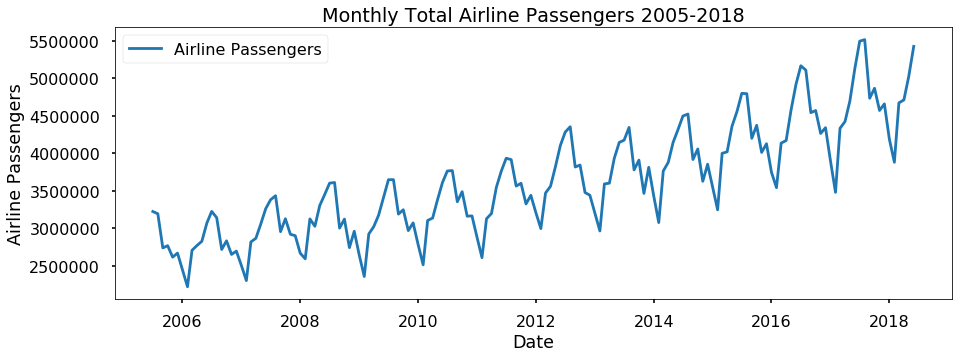

In [4]:
df = pd.read_csv('NYS_mod_tc.csv')
df['Date'] = pd.to_datetime(df['Date'])
y = pd.Series(data = df['Count'].values, index = df['Date'])
# y.plot(figsize=(15,5))
# plt.show()
plt.figure(figsize = (15, 5))
plt.plot(y, label = "Airline Passengers")
plt.xlabel("Date")
plt.ylabel("Airline Passengers")
plt.title("Monthly Total Airline Passengers 2005-2018")
plt.legend()
plt.show()

In [5]:
p = d = q = range(0,3)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [6]:
warnings.filterwarnings("ignore")

best_output = [0, 0, 1000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity= False,
                                            enforce_invertibility= False
                                           )
            results = mod.fit()
            
            print('ARIMA {} x{} - AIC: {}'.format(param,param_seasonal,results.aic))
            
            if results.aic < best_output[2]:
                best_output = [param, param_seasonal, results.aic]
            
        except:
            continue
            
print('\nBest Output = ',best_output)

ARIMA (0, 0, 0) x(0, 0, 1, 12) - AIC: 4650.9750190533605
ARIMA (0, 0, 0) x(0, 0, 2, 12) - AIC: 93233014.93788297
ARIMA (0, 0, 0) x(0, 1, 1, 12) - AIC: 3594.995218308743
ARIMA (0, 0, 0) x(0, 1, 2, 12) - AIC: 3239.6031637969
ARIMA (0, 0, 0) x(0, 2, 1, 12) - AIC: 3246.4877453880977
ARIMA (0, 0, 0) x(0, 2, 2, 12) - AIC: 2848.6063011451624
ARIMA (0, 0, 0) x(1, 0, 0, 12) - AIC: 3788.6642818128325
ARIMA (0, 0, 0) x(1, 0, 1, 12) - AIC: 3757.8574651958024
ARIMA (0, 0, 0) x(1, 0, 2, 12) - AIC: 3441.815561347181
ARIMA (0, 0, 0) x(1, 1, 0, 12) - AIC: 3586.297580349912
ARIMA (0, 0, 0) x(1, 1, 1, 12) - AIC: 3539.9883039596257
ARIMA (0, 0, 0) x(1, 1, 2, 12) - AIC: 3223.045138802398
ARIMA (0, 0, 0) x(1, 2, 0, 12) - AIC: 3207.330194742531
ARIMA (0, 0, 0) x(1, 2, 1, 12) - AIC: 3171.6187376939724
ARIMA (0, 0, 0) x(1, 2, 2, 12) - AIC: 2837.275280888527
ARIMA (0, 0, 0) x(2, 0, 0, 12) - AIC: 3448.275232615271
ARIMA (0, 0, 0) x(2, 0, 1, 12) - AIC: 3446.752504580665
ARIMA (0, 0, 0) x(2, 0, 2, 12) - AIC: 3412.

ARIMA (0, 1, 2) x(1, 2, 2, 12) - AIC: 2727.397939427403
ARIMA (0, 1, 2) x(2, 0, 0, 12) - AIC: 3579.042956194775
ARIMA (0, 1, 2) x(2, 0, 1, 12) - AIC: 3580.935235501601
ARIMA (0, 1, 2) x(2, 0, 2, 12) - AIC: 3500.922033390379
ARIMA (0, 1, 2) x(2, 1, 0, 12) - AIC: 3053.947105509596
ARIMA (0, 1, 2) x(2, 1, 1, 12) - AIC: 3055.7865040137663
ARIMA (0, 1, 2) x(2, 1, 2, 12) - AIC: 2978.1221977456166
ARIMA (0, 1, 2) x(2, 2, 0, 12) - AIC: 2814.915938234503
ARIMA (0, 1, 2) x(2, 2, 1, 12) - AIC: 2806.57382457564
ARIMA (0, 1, 2) x(2, 2, 2, 12) - AIC: 2728.986887629999
ARIMA (0, 2, 0) x(0, 0, 1, 12) - AIC: 4018.947656930515
ARIMA (0, 2, 0) x(0, 0, 2, 12) - AIC: 3671.28057026601
ARIMA (0, 2, 0) x(0, 1, 1, 12) - AIC: 3439.8301049960055
ARIMA (0, 2, 0) x(0, 1, 2, 12) - AIC: 3120.954402448879
ARIMA (0, 2, 0) x(0, 2, 1, 12) - AIC: 3191.0643967593574
ARIMA (0, 2, 0) x(0, 2, 2, 12) - AIC: 2865.0447282480036
ARIMA (0, 2, 0) x(1, 0, 0, 12) - AIC: 3801.4746274826193
ARIMA (0, 2, 0) x(1, 0, 1, 12) - AIC: 3773.1

ARIMA (1, 0, 2) x(0, 1, 1, 12) - AIC: 3311.9556941603187
ARIMA (1, 0, 2) x(0, 1, 2, 12) - AIC: 3000.523216750363
ARIMA (1, 0, 2) x(0, 2, 0, 12) - AIC: 3442.4037299356423
ARIMA (1, 0, 2) x(0, 2, 1, 12) - AIC: 3076.585161131163
ARIMA (1, 0, 2) x(0, 2, 2, 12) - AIC: 2745.848305026738
ARIMA (1, 0, 2) x(1, 0, 0, 12) - AIC: 3904.1923502574077
ARIMA (1, 0, 2) x(1, 0, 1, 12) - AIC: 3851.1658348833766
ARIMA (1, 0, 2) x(1, 0, 2, 12) - AIC: 3525.484372987162
ARIMA (1, 0, 2) x(1, 1, 0, 12) - AIC: 3360.9791420899546
ARIMA (1, 0, 2) x(1, 1, 1, 12) - AIC: 3309.0917665656
ARIMA (1, 0, 2) x(1, 1, 2, 12) - AIC: 3002.295789215668
ARIMA (1, 0, 2) x(1, 2, 0, 12) - AIC: 3135.3271061761106
ARIMA (1, 0, 2) x(1, 2, 1, 12) - AIC: 3064.8259584259863
ARIMA (1, 0, 2) x(1, 2, 2, 12) - AIC: 2746.985176255091
ARIMA (1, 0, 2) x(2, 0, 0, 12) - AIC: 3577.6812081454636
ARIMA (1, 0, 2) x(2, 0, 1, 12) - AIC: 3579.6414558912893
ARIMA (1, 0, 2) x(2, 0, 2, 12) - AIC: 3526.863474028147
ARIMA (1, 0, 2) x(2, 1, 0, 12) - AIC: 305

ARIMA (1, 2, 1) x(1, 2, 0, 12) - AIC: 3123.4159919769304
ARIMA (1, 2, 1) x(1, 2, 1, 12) - AIC: 3070.3828834720907
ARIMA (1, 2, 1) x(1, 2, 2, 12) - AIC: 2745.4486964817597
ARIMA (1, 2, 1) x(2, 0, 0, 12) - AIC: 3554.5432389101416
ARIMA (1, 2, 1) x(2, 0, 1, 12) - AIC: 3554.4410690019076
ARIMA (1, 2, 1) x(2, 0, 2, 12) - AIC: 3528.94055092267
ARIMA (1, 2, 1) x(2, 1, 0, 12) - AIC: 3009.606966353416
ARIMA (1, 2, 1) x(2, 1, 1, 12) - AIC: 3011.606799965975
ARIMA (1, 2, 1) x(2, 1, 2, 12) - AIC: 2988.3695948849036
ARIMA (1, 2, 1) x(2, 2, 0, 12) - AIC: 2781.757731513608
ARIMA (1, 2, 1) x(2, 2, 1, 12) - AIC: 2774.767582965853
ARIMA (1, 2, 1) x(2, 2, 2, 12) - AIC: 2746.835570385415
ARIMA (1, 2, 2) x(0, 0, 0, 12) - AIC: 4288.683897867006
ARIMA (1, 2, 2) x(0, 0, 1, 12) - AIC: 3889.448848477954
ARIMA (1, 2, 2) x(0, 0, 2, 12) - AIC: 3513.1871800013655
ARIMA (1, 2, 2) x(0, 1, 0, 12) - AIC: 3590.0909597507507
ARIMA (1, 2, 2) x(0, 1, 1, 12) - AIC: 3277.1205596736954
ARIMA (1, 2, 2) x(0, 1, 2, 12) - AIC: 29

ARIMA (2, 1, 0) x(2, 2, 2, 12) - AIC: 2749.8644464452177
ARIMA (2, 1, 1) x(0, 0, 0, 12) - AIC: 4312.868612916392
ARIMA (2, 1, 1) x(0, 0, 1, 12) - AIC: 3891.8172755354462
ARIMA (2, 1, 1) x(0, 0, 2, 12) - AIC: 3552.645337128032
ARIMA (2, 1, 1) x(0, 1, 0, 12) - AIC: 3624.2993839908995
ARIMA (2, 1, 1) x(0, 1, 1, 12) - AIC: 3310.788039299853
ARIMA (2, 1, 1) x(0, 1, 2, 12) - AIC: 3000.301046287187
ARIMA (2, 1, 1) x(0, 2, 0, 12) - AIC: 3451.125208428998
ARIMA (2, 1, 1) x(0, 2, 1, 12) - AIC: 3078.887397961894
ARIMA (2, 1, 1) x(0, 2, 2, 12) - AIC: 2749.009147244875
ARIMA (2, 1, 1) x(1, 0, 0, 12) - AIC: 3849.1655710085415
ARIMA (2, 1, 1) x(1, 0, 1, 12) - AIC: 3850.6105876461384
ARIMA (2, 1, 1) x(1, 0, 2, 12) - AIC: 3525.038480020754
ARIMA (2, 1, 1) x(1, 1, 0, 12) - AIC: 3307.0703674600873
ARIMA (2, 1, 1) x(1, 1, 1, 12) - AIC: 3308.8715354899596
ARIMA (2, 1, 1) x(1, 1, 2, 12) - AIC: 3001.625865767512
ARIMA (2, 1, 1) x(1, 2, 0, 12) - AIC: 3085.8708166302104
ARIMA (2, 1, 1) x(1, 2, 1, 12) - AIC: 30

In [7]:
best_output

[(2, 1, 2), (0, 2, 2, 12), 2725.004434104136]

In [22]:
mod1 = sm.tsa.statespace.SARIMAX(y,
                                order = (best_output[0][0], best_output[0][1],best_output[0][1]),
                                seasonal_order = (best_output[1][0], best_output[1][1], best_output[1][2], best_output[1][3]),
                                enforce_stationarity = False,
                                enforce_invertibility =False)

results1 = mod1.fit()

print(results1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(2, 1, 1)x(0, 2, 2, 12)   Log Likelihood               -1368.505
Date:                            Mon, 26 Nov 2018   AIC                           2749.009
Time:                                    07:39:39   BIC                           2767.308
Sample:                                07-01-2005   HQIC                          2756.441
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2825      0.383      0.738      0.461      -0.468       1.033
ar.L2          0.0896      0.323   

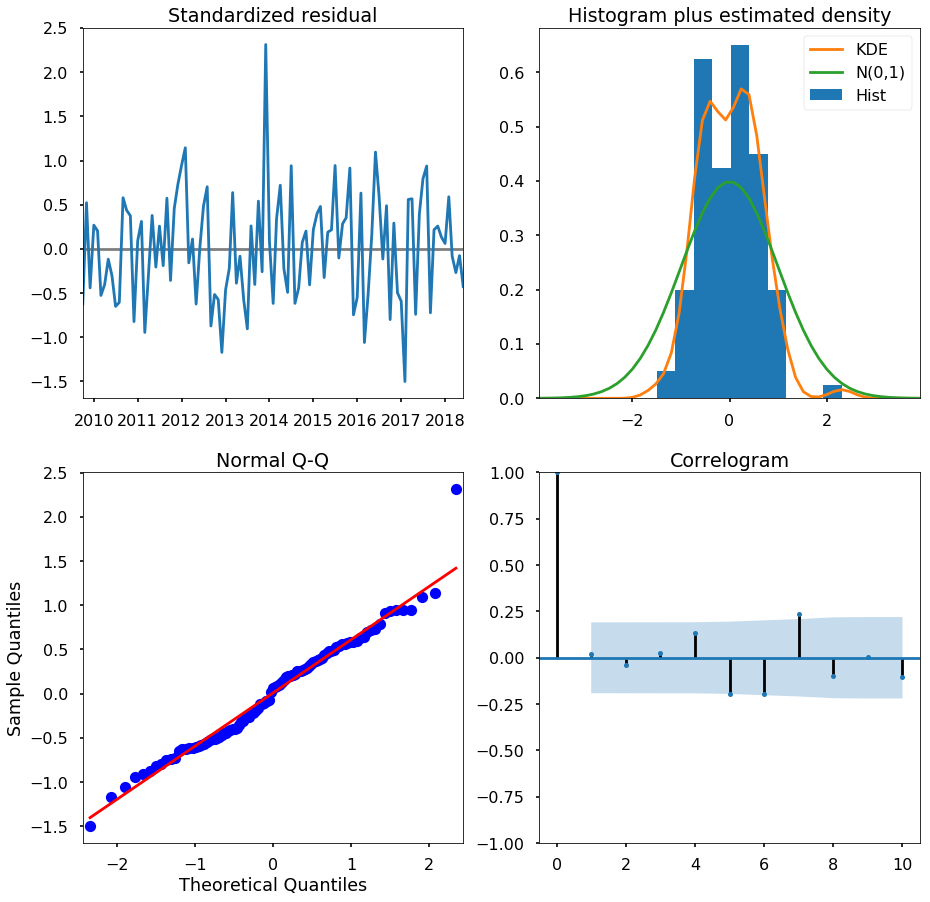

In [9]:
results1.plot_diagnostics(figsize=(15, 15))
plt.show()

In [10]:
#One Step Ahead Forecast
predone = results1.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
predone_ci = predone.conf_int()

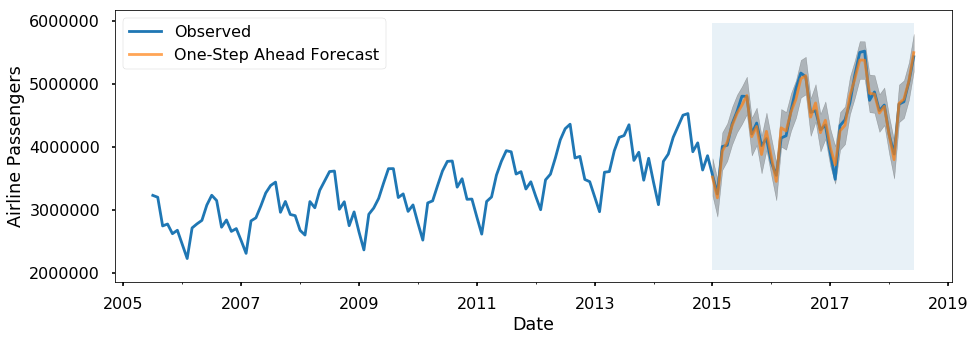

In [11]:
ax = y['2005':].plot(label='Observed', figsize=(15, 5))
predone.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(predone_ci.index,
                predone_ci.iloc[:, 0],
                predone_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [12]:
y_forecasted = predone.predicted_mean
y_truth = y['2015-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse), 2))
print('The Root Mean Square Error (RMSE) of the forecast is {:.4f}'
      .format(np.sqrt(sum((y_forecasted-y_truth)**2)/len(y_truth))))

The Mean Squared Error of our forecasts is 8138774485
The Root Mean Square Error (RMSE) of the forecast is 90215.1566


In [13]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results1.get_forecast(steps= 24)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower y,upper y
2018-07-01,5.543745e+06,6.140872e+06
2018-08-01,5.487510e+06,6.169886e+06
2018-09-01,4.675490e+06,5.424310e+06
2018-10-01,4.764603e+06,5.563459e+06
2018-11-01,4.465771e+06,5.308324e+06


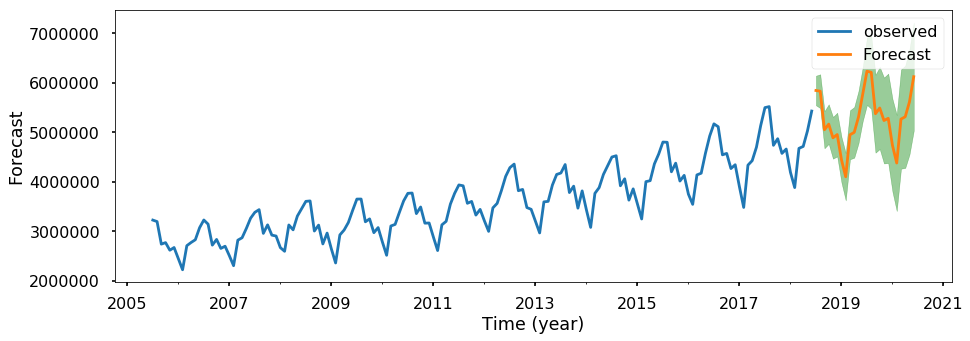

In [21]:
ax = y.plot(label='observed', figsize=(15, 5))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Forecast')
plt.legend()
plt.show()